In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Copiar el archivo a tu entorno de trabajo
!cp /content/drive/MyDrive/Steam_2024_bestRevenue_1500.csv /content/

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('/content/Steam_2024_bestRevenue_1500.csv')

# Mostrar las primeras filas del DataFrame
df.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [ ]:
# Ver el número de observaciones (filas) y columnas
df.shape

(1500, 12)

In [ ]:
# Obtener estadísticas descriptivas para las columnas numéricas
df.describe()

,copiesSold,price,revenue,avgPlaytime,reviewScore,steamId,log_copiesSold
count,1.500000e+03,1500.000000,1.500000e+03,1500.000000,1500.000000,1.500000e+03,1500.000000
mean,1.414826e+05,17.519513,2.632382e+06,12.562704,76.201333,2.183788e+06,9.644544
std,1.132757e+06,12.646612,2.781024e+07,21.542173,24.319438,6.067725e+05,1.606380
min,5.930000e+02,0.000000,2.067400e+04,0.000000,0.000000,2.488000e+04,6.386879
25%,4.918750e+03,9.990000,4.550425e+04,3.564848,72.000000,1.792795e+06,8.501012
50%,1.192850e+04,14.990000,1.090530e+05,6.762776,83.000000,2.321985e+06,9.386763
75%,3.786975e+04,19.990000,4.551568e+05,13.104473,92.000000,2.693228e+06,10.541912
max,3.073915e+07,99.990000,8.377934e+08,296.332852,100.000000,3.107330e+06,17.241048


In [ ]:
# Ver los tipos de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
 11  log_copiesSold  1500 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 140.8+ KB


In [ ]:
# Contar los valores únicos en columnas categóricas
print(df['publisherClass'].value_counts())
print(df['publishers'].value_counts())

publisherClass
Indie       1301
AA           146
AAA           52
Hobbyist       1
Name: count, dtype: int64
publishers
Kagura Games                     17
Electronic Arts                  16
072 Project                      14
Ubisoft                          13
Mango Party,Mango Party News     11
                                 ..
BLAMCAM Interactive               1
Soda Game Studio                  1
Frogstorm                         1
Significant Steak                 1
Red Nexus Games Inc.,IndieArk     1
Name: count, Length: 1131, dtype: int64


In [ ]:
# Seleccionar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Mostrar la matriz de correlación
correlation_matrix

,copiesSold,price,revenue,avgPlaytime,reviewScore,steamId,log_copiesSold
copiesSold,1.000000,0.056224,0.627700,0.099065,0.008584,-0.056482,0.392977
price,0.056224,1.000000,0.162521,0.029053,-0.035025,-0.266997,0.050970
revenue,0.627700,0.162521,1.000000,0.082426,0.007383,-0.076866,0.304766
avgPlaytime,0.099065,0.029053,0.082426,1.000000,-0.031980,-0.118001,0.246128
reviewScore,0.008584,-0.035025,0.007383,-0.031980,1.000000,0.004844,-0.080732
steamId,-0.056482,-0.266997,-0.076866,-0.118001,0.004844,1.000000,-0.158614
log_copiesSold,0.392977,0.050970,0.304766,0.246128,-0.080732,-0.158614,1.000000


In [ ]:
# Mostrar la matriz de correlación
print(correlation_matrix)


                copiesSold     price   revenue  avgPlaytime  reviewScore  \
copiesSold        1.000000  0.056224  0.627700     0.099065     0.008584   
price             0.056224  1.000000  0.162521     0.029053    -0.035025   
revenue           0.627700  0.162521  1.000000     0.082426     0.007383   
avgPlaytime       0.099065  0.029053  0.082426     1.000000    -0.031980   
reviewScore       0.008584 -0.035025  0.007383    -0.031980     1.000000   
steamId          -0.056482 -0.266997 -0.076866    -0.118001     0.004844   
log_copiesSold    0.392977  0.050970  0.304766     0.246128    -0.080732   

                 steamId  log_copiesSold  
copiesSold     -0.056482        0.392977  
price          -0.266997        0.050970  
revenue        -0.076866        0.304766  
avgPlaytime    -0.118001        0.246128  
reviewScore     0.004844       -0.080732  
steamId         1.000000       -0.158614  
log_copiesSold -0.158614        1.000000  


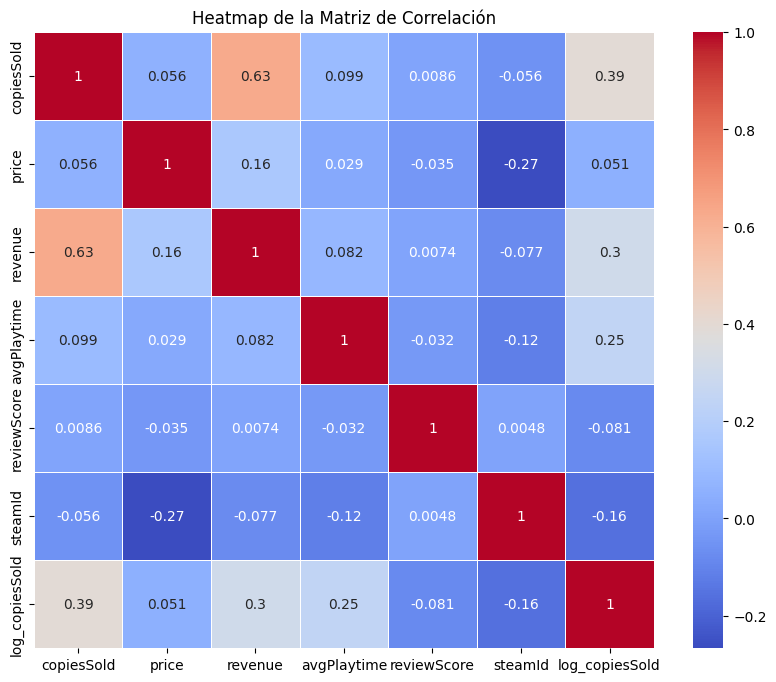

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación de las columnas numéricas
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()



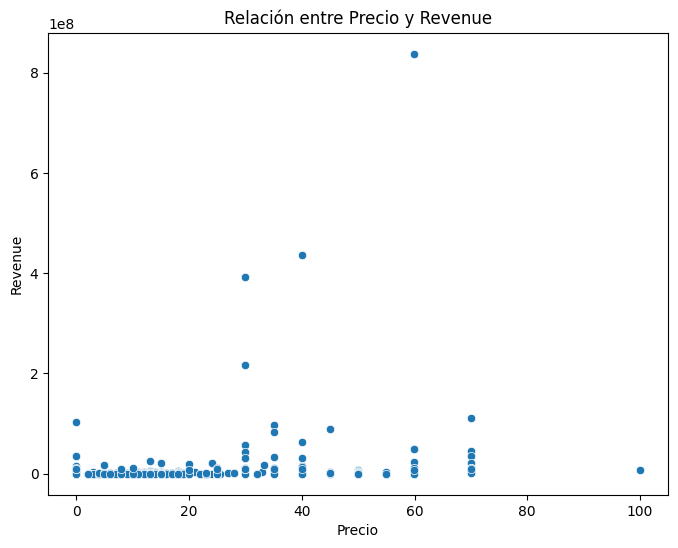

In [ ]:
# Crear un gráfico de dispersión para observar la relación entre 'price' y 'revenue'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='revenue', data=df)
plt.title('Relación entre Precio y Revenue')
plt.xlabel('Precio')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Eliminar columnas categóricas no deseadas excepto 'publisherClass'
df = df.drop(['name', 'releaseDate', 'publishers', 'developers', 'steamId'], axis=1)

In [ ]:
# Aplicar transformación logarítmica a características con alta variabilidad
df['log_copiesSold'] = np.log1p(df['copiesSold'])

# Realizar One-Hot Encoding a la columna 'publisherClass'
df_encoded = pd.get_dummies(df, columns=['publisherClass'], drop_first=True)

# Definir las características (X) y la variable objetivo continua (y)
X = df_encoded.drop('revenue', axis=1)  # Todas las columnas menos 'revenue'
y = df_encoded['revenue']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Definir un espacio de hiperparámetros para la búsqueda en cuadrícula
param_grid_rf_regressor = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Configurar la búsqueda en cuadrícula
grid_search_rf_regressor = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf_regressor, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf_regressor.fit(X_train_scaled, y_train)

# Obtener el mejor modelo de la búsqueda
best_rf_regressor = grid_search_rf_regressor.best_estimator_

# Realizar predicciones y evaluar el modelo
y_pred = best_rf_regressor.predict(X_test_scaled)

# Imprimir los resultados de la evaluación
print("\nMejores parámetros encontrados para RandomForestRegressor:", grid_search_rf_regressor.best_params_)
print("\nEvaluación del modelo de Random Forest Regressor:")
print("R^2:", r2_score(y_test, y_pred))



Mejores parámetros encontrados para RandomForestRegressor: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}

Evaluación del modelo de Random Forest Regressor:
R^2: 0.8160564956266907


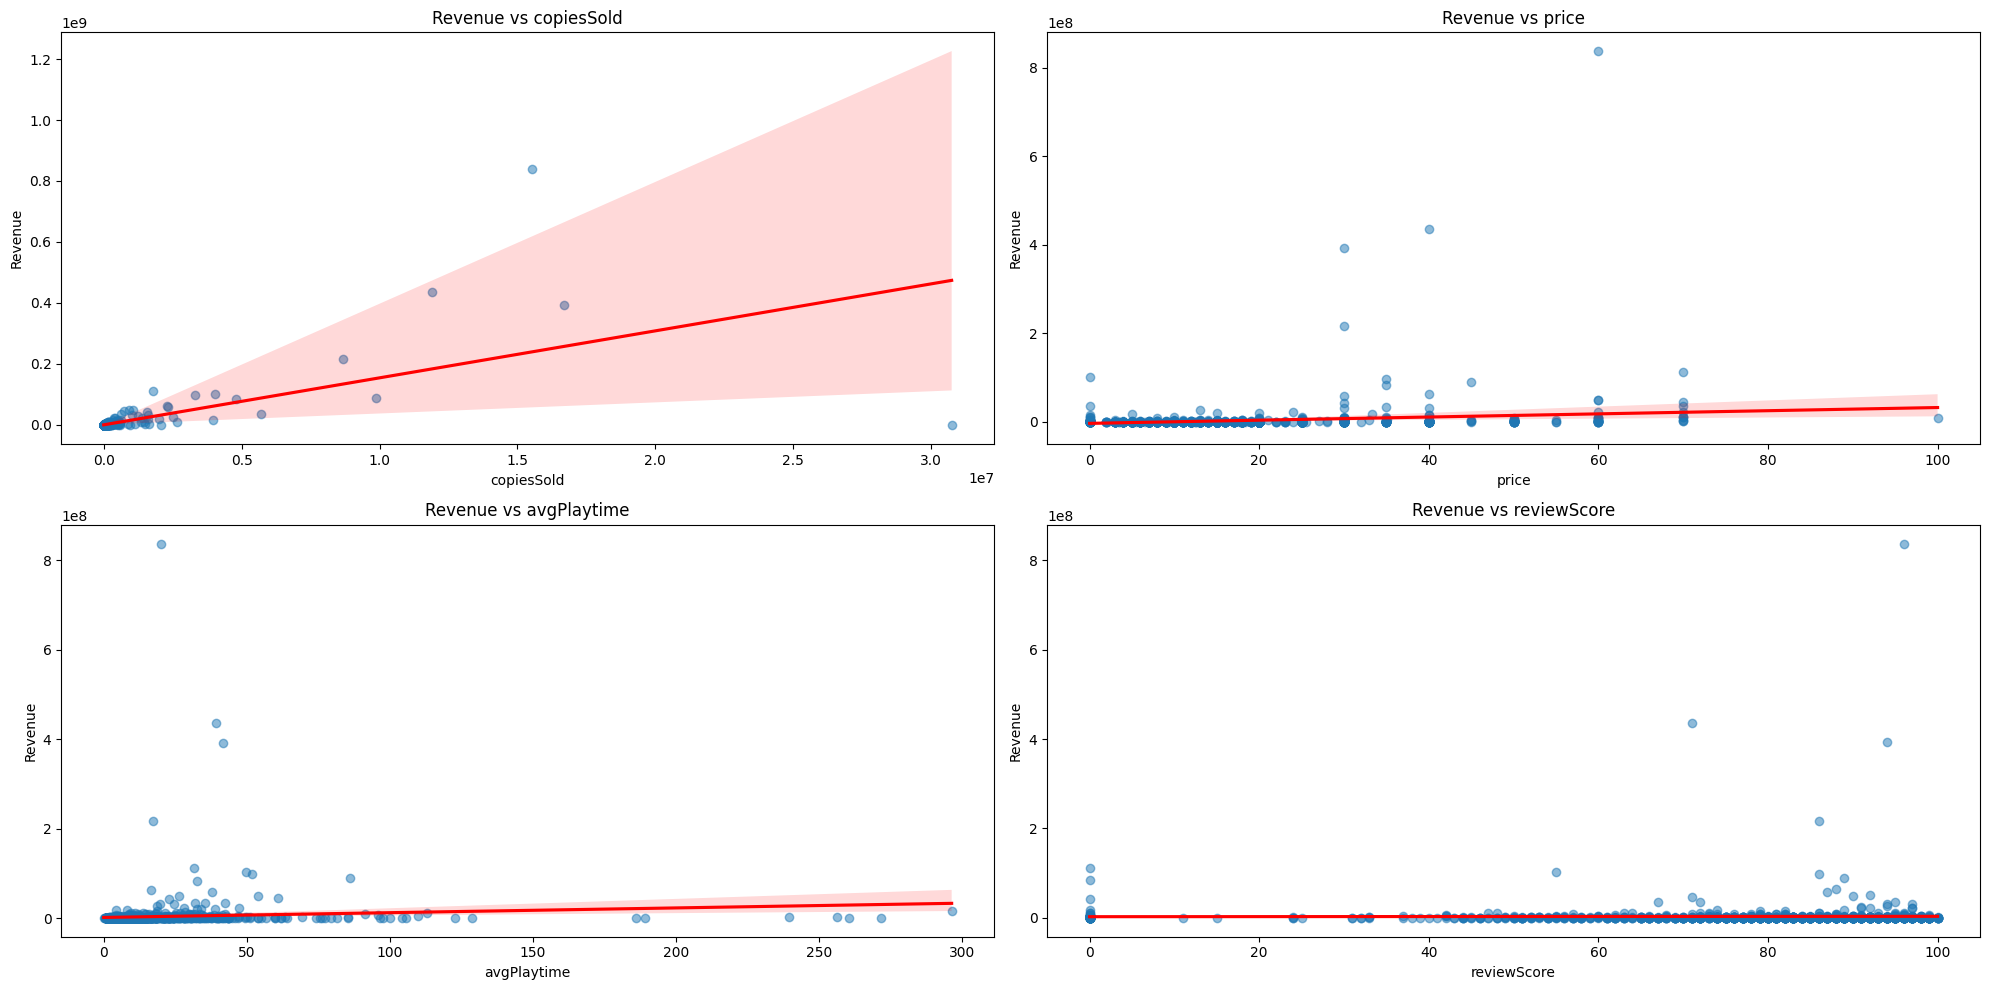

In [ ]:
# Importar las bibliotecas necesarias
import seaborn as sns

# Listar las variables de entrada que queremos graficar
variables = ['copiesSold', 'price', 'avgPlaytime', 'reviewScore']

# Crear gráficos de dispersión y de regresión para visualizar 'revenue' contra las variables
plt.figure(figsize=(20, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=var, y='revenue', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    plt.title(f'Revenue vs {var}')
    plt.xlabel(var)
    plt.ylabel('Revenue')

plt.tight_layout()
plt.show()



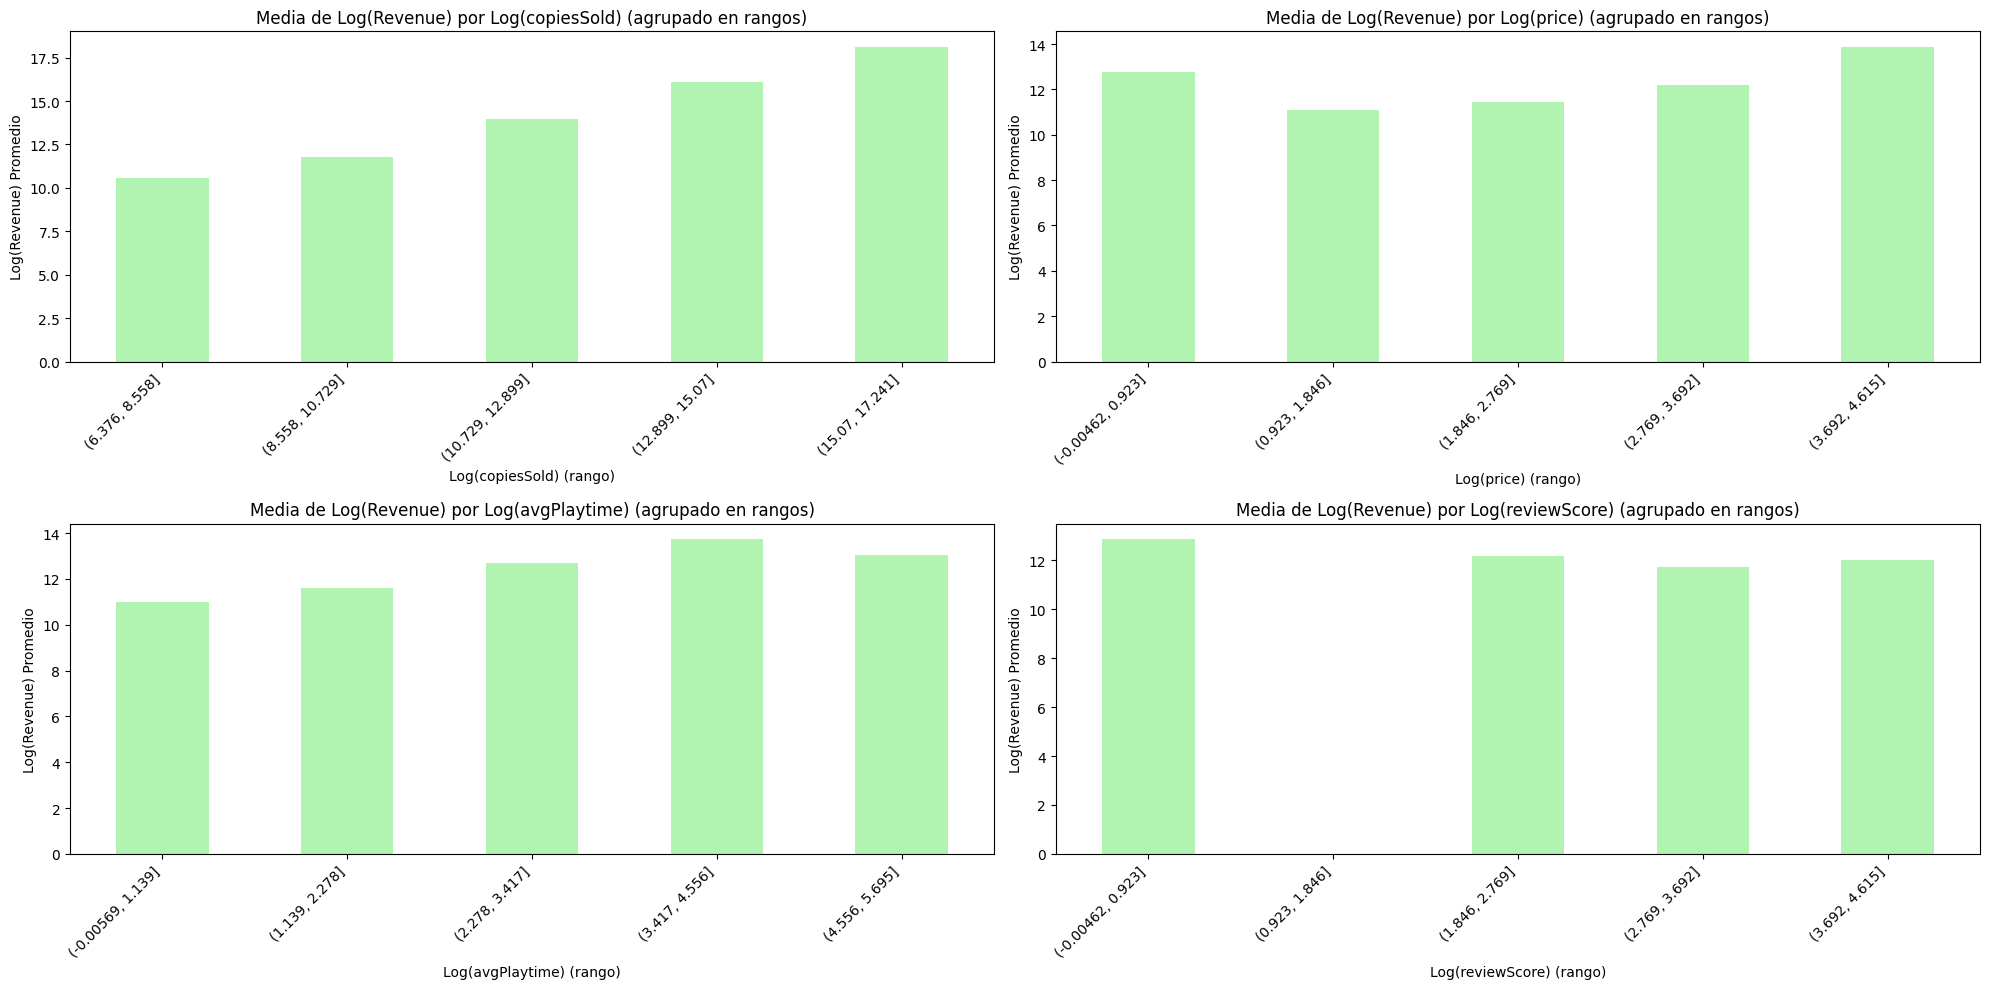

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Aplicar transformación logarítmica a 'revenue' y otras variables con alta variabilidad
variables = ['copiesSold', 'price', 'avgPlaytime', 'reviewScore']
for var in variables + ['revenue']:
    df['log_' + var] = np.log1p(df[var])

# Crear gráficos de barras para comparar log(revenue) con las variables numéricas transformadas
plt.figure(figsize=(20, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    # Agrupar por rangos de la variable logarítmica y calcular la media de log(revenue)
    df['log_' + var + '_bins'] = pd.cut(df['log_' + var], bins=5)
    revenue_means = df.groupby('log_' + var + '_bins')['log_revenue'].mean()

    # Graficar
    revenue_means.plot(kind='bar', color='lightgreen', alpha=0.7)
    plt.title(f'Media de Log(Revenue) por Log({var}) (agrupado en rangos)')
    plt.xlabel(f'Log({var}) (rango)')
    plt.ylabel('Log(Revenue) Promedio')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir un espacio de hiperparámetros más detallado para la búsqueda
param_grid_rf_fine = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [2, 3, 4]
}

# Configurar la búsqueda en cuadrícula
grid_search_rf_fine = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf_fine, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf_fine.fit(X_train_scaled, y_train)

# Obtener el mejor modelo de la búsqueda
best_rf_model_fine = grid_search_rf_fine.best_estimator_

# Realizar predicciones y evaluar el modelo
y_pred_rf_fine = best_rf_model_fine.predict(X_test_scaled)

# Imprimir los resultados de la evaluación
print("\nMejores parámetros encontrados después de afinar el modelo:", grid_search_rf_fine.best_params_)
print("\nEvaluación del modelo de Random Forest afinado:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf_fine))
print("RMSE:", mean_squared_error(y_test, y_pred_rf_fine, squared=False))
print("R^2:", r2_score(y_test, y_pred_rf_fine))


Mejores parámetros encontrados después de afinar el modelo: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}

Evaluación del modelo de Random Forest afinado:
MAE: 1178358.275228617
RMSE: 12256593.092273066
R^2: 0.808599884225705


In [ ]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros a probar
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda en cuadrícula
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train_scaled, y_train)

# Obtener el mejor modelo de la búsqueda
best_rf_model = grid_search_rf.best_estimator_

# Realizar predicciones y evaluar el modelo
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Imprimir los resultados de la evaluación
print("\nMejores parámetros encontrados para RandomForestRegressor:", grid_search_rf.best_params_)
print("\nEvaluación del mejor modelo de Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R^2:", r2_score(y_test, y_pred_rf))


Mejores parámetros encontrados para RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

Evaluación del mejor modelo de Random Forest:
MAE: 1427152.739213129
RMSE: 15155288.024832087
R^2: 0.7073617784236652


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Ignorar advertencias de deprecación
warnings.filterwarnings('ignore')

# Definir X y y
X = df[['copiesSold', 'price', 'avgPlaytime', 'reviewScore']]
y = df['revenue']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir los datos escalados a DataFrames para mayor claridad (opcional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Configurar los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de árbol de decisión
tree = DecisionTreeRegressor(random_state=42)

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo de la búsqueda
best_tree = grid_search.best_estimator_

# Realizar predicciones y evaluar el modelo
y_pred_best = best_tree.predict(X_test_scaled)

# Imprimir los resultados de la evaluación
print("\nMejores parámetros encontrados:", grid_search.best_params_)
print("\nEvaluación del mejor modelo de árbol de decisión:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", mean_squared_error(y_test, y_pred_best, squared=False))
print("R^2:", r2_score(y_test, y_pred_best))



Mejores parámetros encontrados: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

Evaluación del mejor modelo de árbol de decisión:
MAE: 2112650.235320339
RMSE: 24880427.11255267
R^2: 0.21128822847950468


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir X y y
X = df[['copiesSold', 'price', 'avgPlaytime', 'reviewScore']]
y = df['revenue']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir los datos escalados a DataFrames para mayor claridad (opcional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Entrenar un modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_tree = tree_model.predict(X_test_scaled)
print("\nEvaluación del modelo de árbol de decisión:")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("RMSE:", mean_squared_error(y_test, y_pred_tree, squared=False))
print("R^2:", r2_score(y_test, y_pred_tree))



Evaluación del modelo de árbol de decisión:
MAE: 2212481.891996045
RMSE: 26781486.53601796
R^2: 0.08615609730029361


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
